In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# History

In [2]:
def plot_columns(df, columns, ylim=None, logaxis=False):
    # Check if 'Iteration' is a column in the DataFrame
    if 'Iteration' not in df.columns:
        raise ValueError("The DataFrame does not contain an 'Iteration' column.")
    
    # Check if all columns in the list are present in the DataFrame
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"The DataFrame does not contain the column: {column}")
    
    # Plotting each specified column against the 'Iteration' column
    plt.figure(figsize=(20, 6))
    for column in columns:
        plt.plot(df['Iteration'], df[column], label=column)

    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Setting the y-axis to a logarithmic scale if specified
    if logaxis:
        plt.yscale('log')

    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('Plot of Columns over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
history = 'history/training_history.csv'
history = pd.read_csv(history)

history.head()

,Elapsed Time,Iteration,Total Iterations,D/latent_real,D/latent_fake,D/latent_reg,D/ref_real,D/ref_fake,D/ref_reg,G/latent_adv,...,G/latent_ds,G/ref_adv,G/ref_dom,G/ref_cyc,G/ref_id,G/ref_sty,G/ref_ds,G/lambda_ds,G/lambda_dom,G/lambda_trts
0,0:00:56,100,500000,0.001787,0.004513,0.009888,0.000558,0.002772,0.009555,0.454055,...,0.625056,0.519281,55.106800,0.451635,0.388398,4.088524,0.022265,1.0,0.1,0.0
1,0:01:27,200,500000,0.001438,0.003309,0.007804,0.000313,0.006192,0.007713,0.534387,...,0.480592,0.467236,41.791862,0.282431,0.233973,2.578701,0.019077,1.0,0.1,0.0
2,0:01:58,300,500000,0.017684,0.002296,0.047868,0.000783,0.010510,0.015629,0.460651,...,0.403016,0.505156,36.727730,0.195051,0.161769,1.446061,0.019888,1.0,0.1,0.0
3,0:02:28,400,500000,0.048255,0.002547,0.063363,0.001168,0.144794,0.026158,0.608277,...,0.350162,0.577368,16.588709,0.156158,0.146568,2.070701,0.042139,1.0,0.1,0.0
4,0:02:59,500,500000,0.014920,0.006191,0.061981,0.001882,0.073761,0.032815,0.548408,...,0.318681,0.466929,23.028337,0.140406,0.132002,1.075831,0.006873,1.0,0.1,0.0


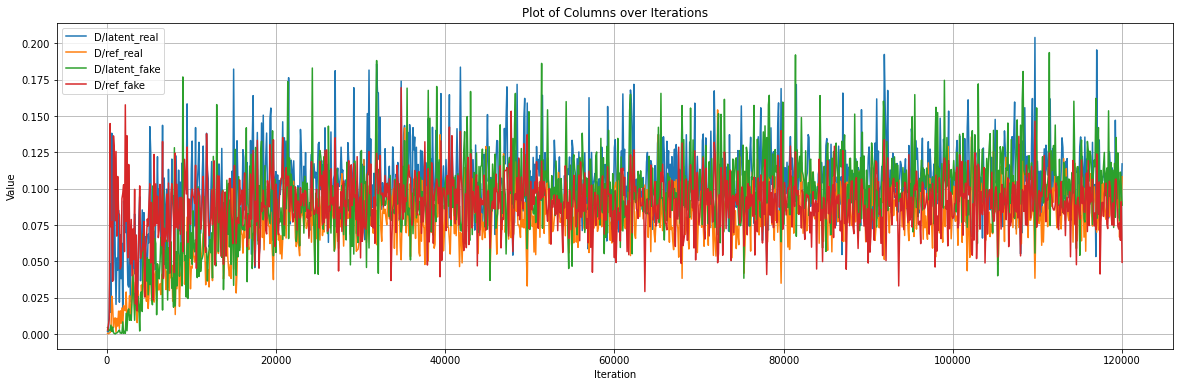

In [4]:
plot_columns(history, ['D/latent_real', 'D/ref_real', 'D/latent_fake', 'D/ref_fake'], logaxis=False)

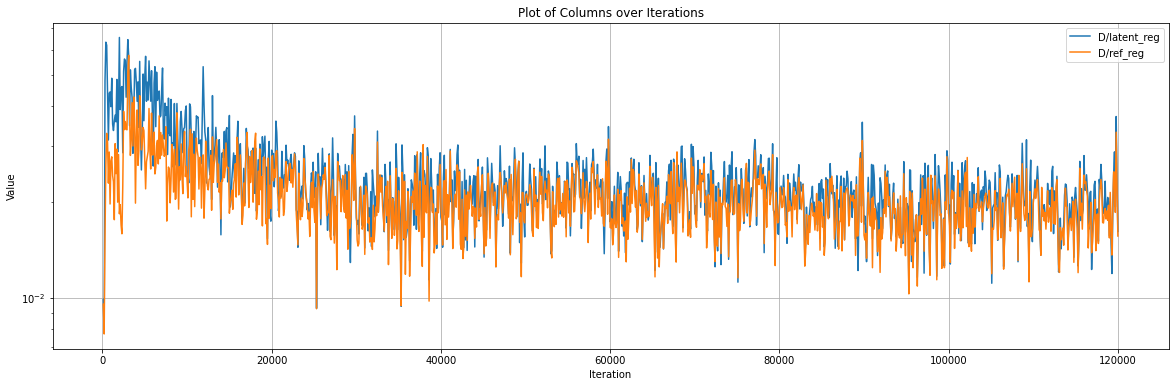

In [5]:
plot_columns(history, ['D/latent_reg', 'D/ref_reg'], logaxis=True)

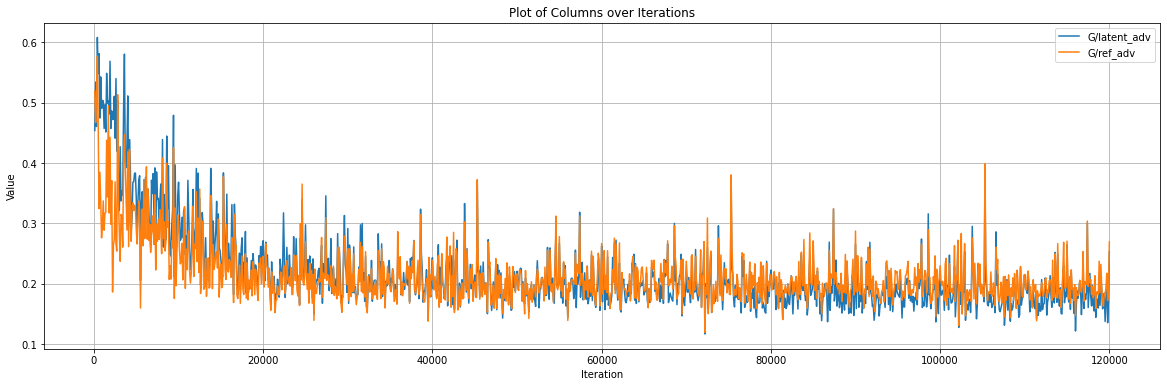

In [6]:
plot_columns(history, ['G/latent_adv', 'G/ref_adv'], logaxis=False)

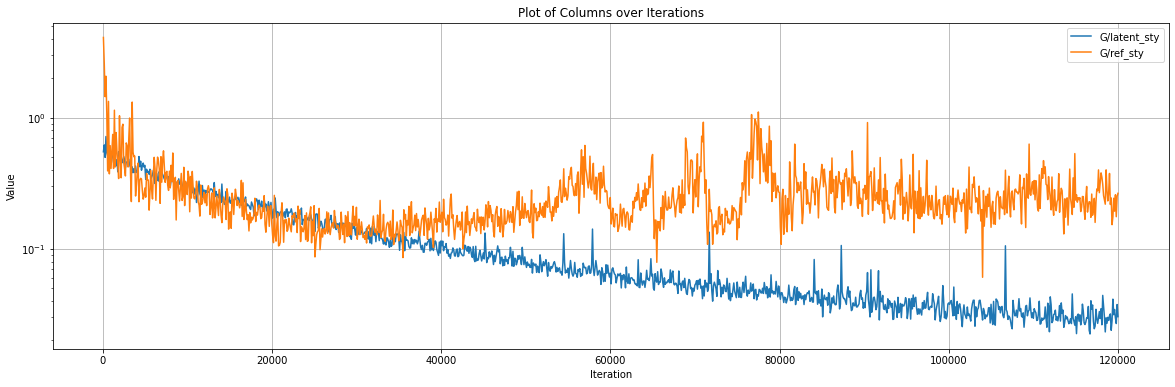

In [7]:
plot_columns(history, ['G/latent_sty', 'G/ref_sty'], logaxis=True)

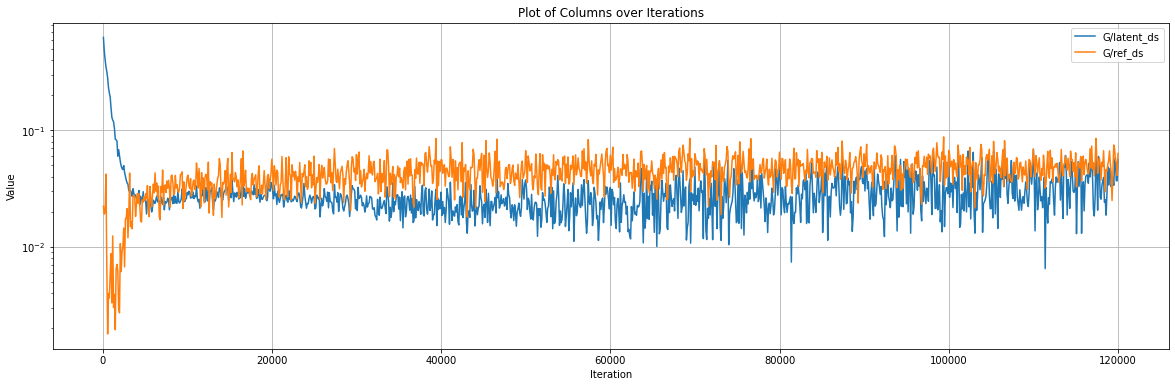

In [8]:
plot_columns(history, ['G/latent_ds', 'G/ref_ds'], logaxis=True)

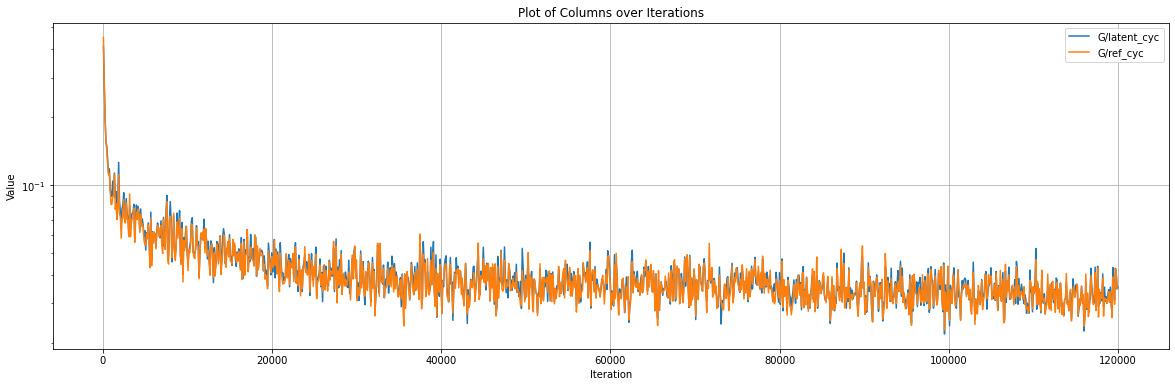

In [9]:
plot_columns(history, ['G/latent_cyc', 'G/ref_cyc'], logaxis=True)

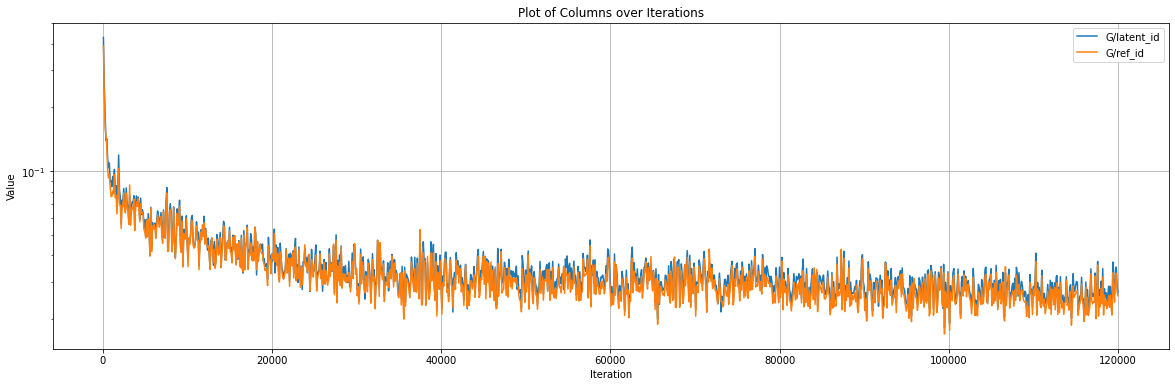

In [10]:
plot_columns(history, ['G/latent_id', 'G/ref_id'], logaxis=True)

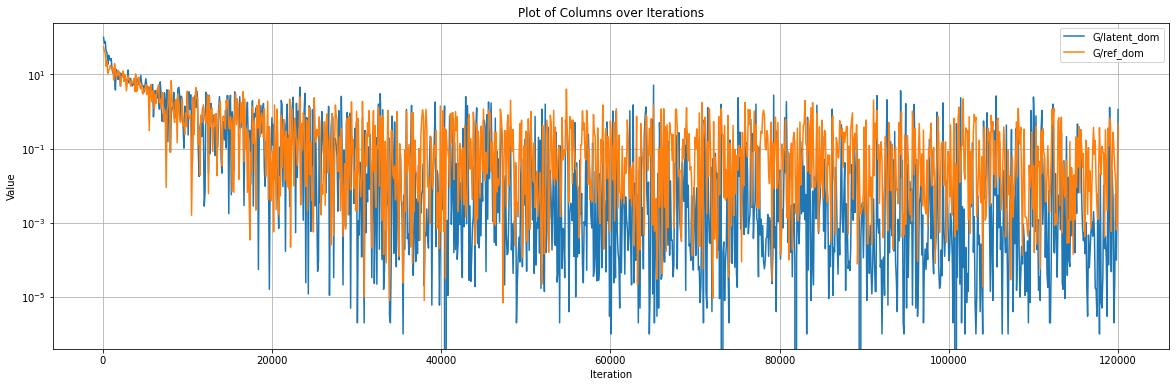

In [11]:
plot_columns(history, ['G/latent_dom', 'G/ref_dom'], logaxis=True)

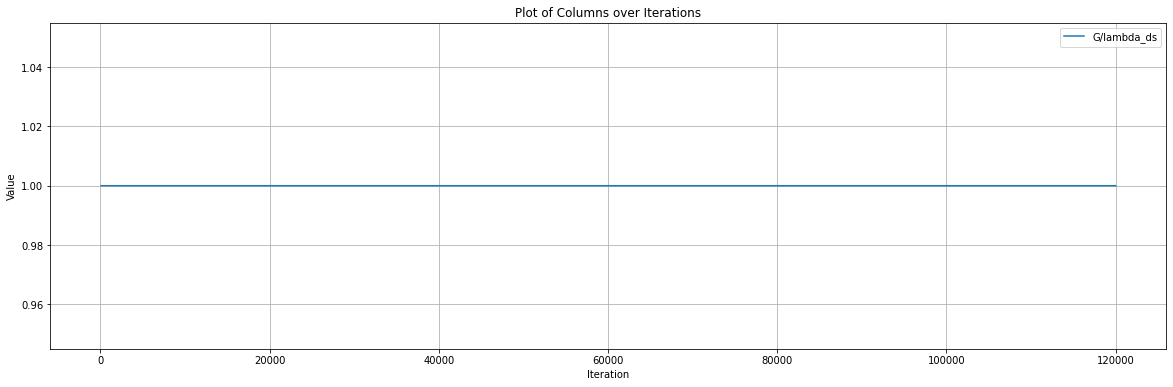

In [12]:
plot_columns(history, ['G/lambda_ds'])

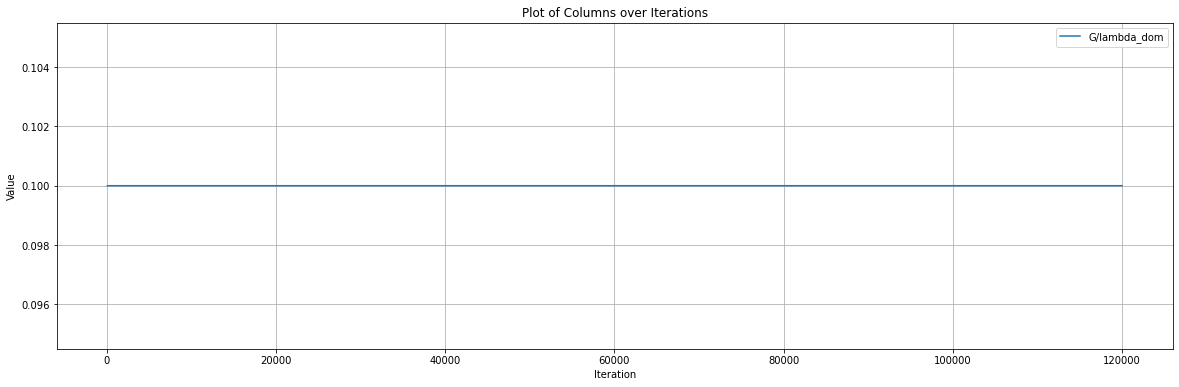

In [13]:
plot_columns(history, ['G/lambda_dom'])

# Metrics

## TSTR Score

In [14]:
file_path = 'eval/TSTR_scores.csv'
classification_scores = pd.read_csv(file_path)
classification_scores.head()

,step,mode,source,domain,accuracy,loss
0,10000,latent,WAL,15,0.560000,6.354508
1,10000,latent,WAL,16,0.277778,5.906431
2,10000,latent,WAL,17,0.226415,6.223602
3,10000,latent,WAL,18,0.518519,8.923906
4,10000,latent,WAL,19,0.240741,10.068056


In [15]:
# def plot_average_by_mode_metric(metrics, mode, metric):
    
#     # Filter the DataFrame based on the mode and metric
#     filtered_data = metrics[(metrics['mode'] == mode)]

#     # Group by 'step' and 'source', then calculate the mean for each group
#     mean_data = filtered_data.groupby(['step', 'source']).agg({metric: 'mean'}).reset_index()

#     # Plotting
#     plt.figure(figsize=(20, 6))
#     for source in mean_data['source'].unique():
#         source_data = mean_data[mean_data['source'] == source]
#         plt.plot(source_data['step'], source_data[metric], label=source)
#         if metric == 'accuracy':
#             # Find the maximum value of the metric and its corresponding step
#             max_value = source_data[metric].max()
#             max_step = source_data[source_data[metric] == max_value]['step'].values[0]
#             print(f'Maximum {metric} for {source} in {mode} mode: {max_value:.4f} at step {max_step}')
#         elif metric == 'loss':
#             # Find the minimum value of the metric and its corresponding step
#             min_value = source_data[metric].min()
#             min_step = source_data[source_data[metric] == min_value]['step'].values[0]
#             print(f'Minimum {metric} for {source} in {mode} mode: {min_value:.4f} at step {min_step}')

#     plt.title(f'Average {metric} for {mode} mode')
#     plt.xlabel('Step')
#     plt.ylabel(metric.capitalize())
#     plt.legend(title='Source')
#     plt.grid(True)
#     plt.show()

# for metric in ['accuracy', 'loss']:
#     for mode in classification_scores['mode'].unique():
#         plot_average_by_mode_metric(classification_scores, mode, metric)

In [16]:
# def plot_average_by_activity(metrics, metric):
    
#     # Filter the DataFrame based on the mode and metric
#     filtered_data = metrics

#     # Group by 'step' and 'source', then calculate the mean for each group
#     mean_data = filtered_data.groupby(['step', 'source']).agg({metric: 'mean'}).reset_index()

#     # Plotting
#     plt.figure(figsize=(20, 6))
#     for source in mean_data['source'].unique():
#         source_data = mean_data[mean_data['source'] == source]
#         plt.plot(source_data['step'], source_data[metric], label=source)
#         if metric == 'accuracy':
#             # Find the maximum value of the metric and its corresponding step
#             max_value = source_data[metric].max()
#             max_step = source_data[source_data[metric] == max_value]['step'].values[0]
#             print(f'Maximum {metric} for {source}: {max_value:.4f} at step {max_step}')
#         elif metric == 'loss':
#             # Find the minimum value of the metric and its corresponding step
#             min_value = source_data[metric].min()
#             min_step = source_data[source_data[metric] == min_value]['step'].values[0]
#             print(f'Minimum {metric} for {source}: {min_value:.4f} at step {min_step}')
#             # source_data.to_csv(f'{source}_{metric}.csv', index=False)

#     plt.title(f'Average {metric}')
#     plt.xlabel('Step')
#     plt.ylabel(metric.capitalize())
#     plt.legend(title='Source')
#     plt.grid(True)
#     plt.show()

# for metric in ['accuracy', 'loss']:
#     plot_average_by_activity(classification_scores, metric)

Max in latent mode: 0.6382 at step 120000
Max in reference mode: 0.6841 at step 60000


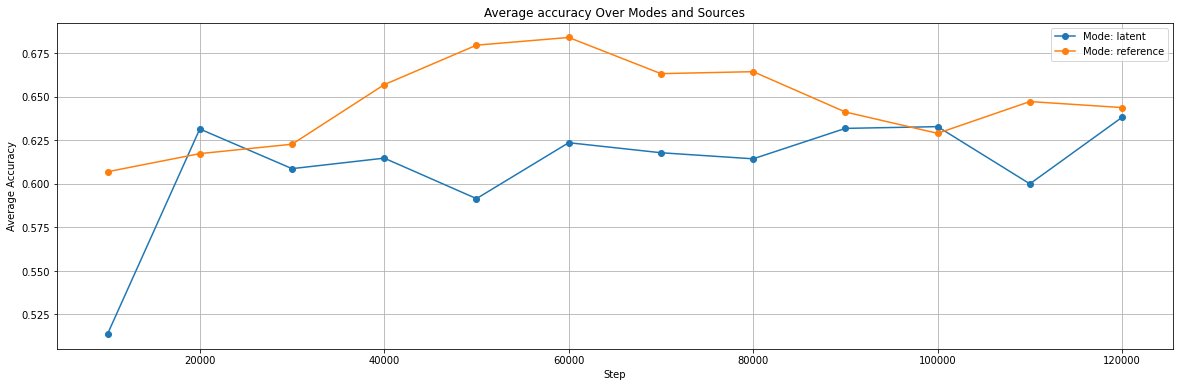

Min in latent mode: 1.6306 at step 90000
Min in reference mode: 0.9475 at step 70000


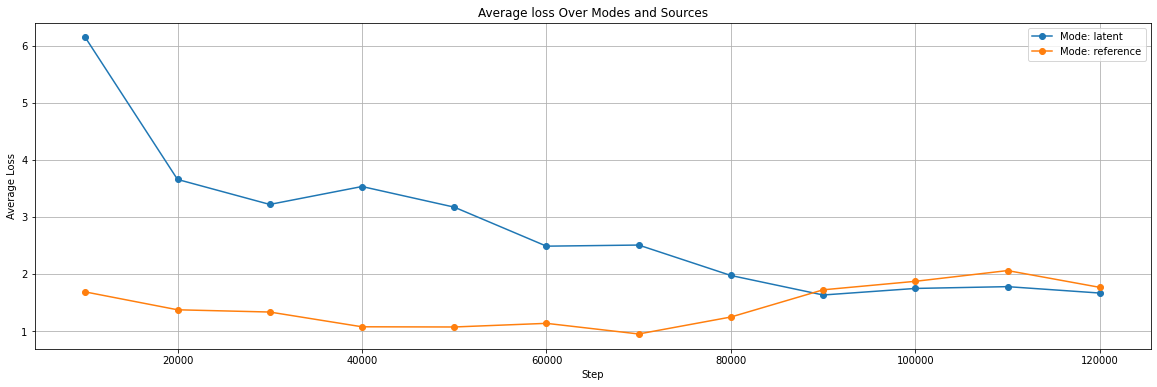

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_metric_over_modes_sources(metrics, metric, ylim=None):
    """
    Plots two lines, each representing the average of values for each mode, averaged over all sources.
    
    Parameters:
        metrics (pd.DataFrame): DataFrame containing the metrics.
        metric (str): The metric to filter by (e.g., 'accuracy' or 'logloss').
    """
    # Filter the DataFrame based on the metric
    filtered_data = metrics

    # Group by 'step', 'mode' and then calculate the mean across 'source' and 'subject'
    mean_data = filtered_data.groupby(['step', 'mode']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    modes = mean_data['mode'].unique()
    for mode in modes:
        mode_data = mean_data[mean_data['mode'] == mode]
        # mode_data.to_csv(f'{mode}_{metric}.csv', index=False)
        plt.plot(mode_data['step'], mode_data[metric], label=f'Mode: {mode}', marker='o')
        max_value = mode_data[metric].max()
        min_value = mode_data[metric].min()
        # # Find the maximum or minimum value of the metric before step 322000
        # max_before_322000 = mode_data[mode_data['step'] < 322000][metric].max()
        if metric == 'accuracy':
            step = mode_data[mode_data[metric] == max_value]['step'].values[0]
            print(f'Max in {mode} mode: {max_value:.4f} at step {step}')
            # step_before_322000 = mode_data[mode_data[metric] == max_before_322000]['step'].values[0]
            # print(f'Max in {mode} mode before finetune: {max_before_322000:.4f} at step {step_before_322000}')
        else:
            step = mode_data[mode_data[metric] == min_value]['step'].values[0]
            print(f'Min in {mode} mode: {min_value:.4f} at step {step}')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    plt.title(f'Average {metric} Over Modes and Sources')
    plt.xlabel('Step')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.legend()
    plt.grid(True)
    # # Plot a vertical line at step 322000
    # plt.axvline(x=322000, color='r', linestyle='--', label='Finetuning Start')
    plt.show()

# plot_average_metric_over_modes_sources(classification_scores, 'accuracy', ylim=(0, 1))
plot_average_metric_over_modes_sources(classification_scores, 'accuracy')
plot_average_metric_over_modes_sources(classification_scores, 'loss')

Max: 0.6539 at step 60000


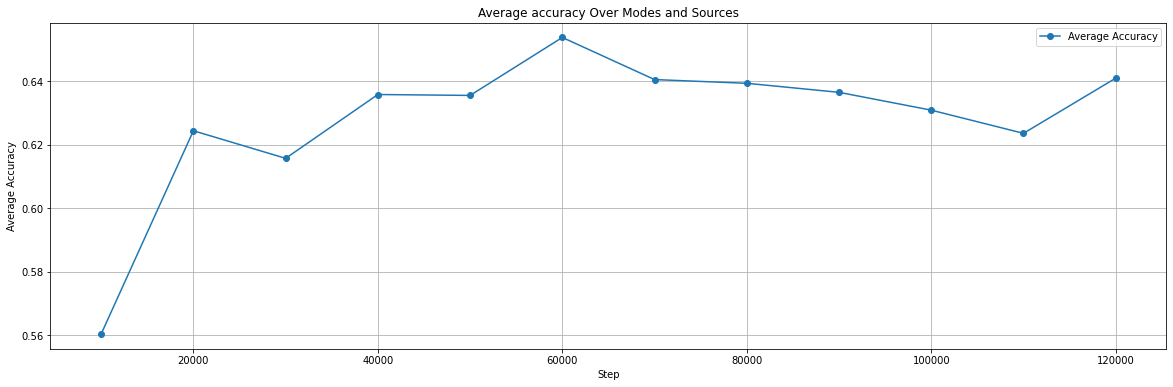

Min: 1.6085 at step 80000


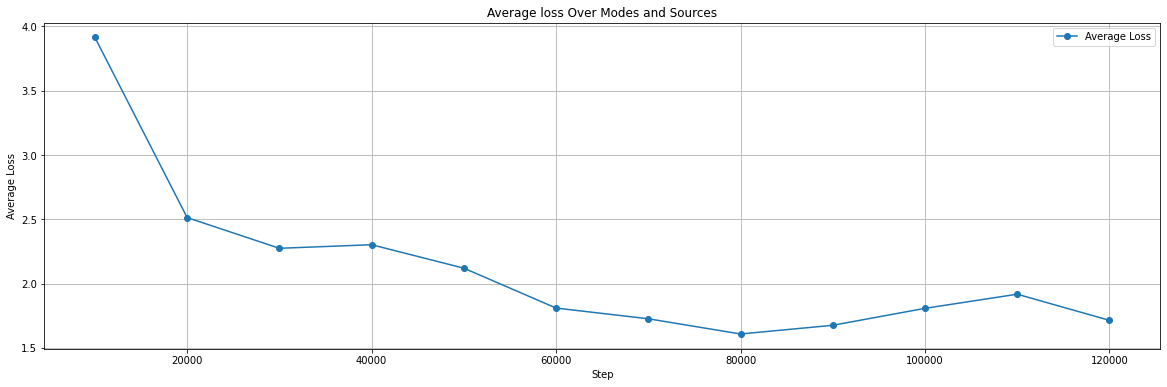

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_metric_over_modes_sources(metrics, metric, ylim=None):
    """
    Plots two lines, each representing the average of values for each mode, averaged over all sources.
    
    Parameters:
        metrics (pd.DataFrame): DataFrame containing the metrics.
        metric (str): The metric to filter by (e.g., 'accuracy' or 'logloss').
    """
    # Filter the DataFrame based on the metric
    filtered_data = metrics

    # Group by 'step', 'mode' and then calculate the mean across 'source' and 'subject'
    mean_data = filtered_data.groupby(['step']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    plt.plot(mean_data['step'], mean_data[metric], label=f'Average {metric.capitalize()}', marker='o')
    max_value = mean_data[metric].max()
    min_value = mean_data[metric].min()
    if metric == 'accuracy':
        step = mean_data[mean_data[metric] == max_value]['step'].values[0]
        print(f'Max: {max_value:.4f} at step {step}')
    else:
        step = mean_data[mean_data[metric] == min_value]['step'].values[0]
        print(f'Min: {min_value:.4f} at step {step}')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    plt.title(f'Average {metric} Over Modes and Sources')
    plt.xlabel('Step')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.legend()
    plt.grid(True)
    # # Plot a vertical line at step 322000
    # plt.axvline(x=322000, color='r', linestyle='--', label='Finetuning Start')
    plt.show()

# plot_average_metric_over_modes_sources(classification_scores, 'accuracy', ylim=(0, 1))
plot_average_metric_over_modes_sources(classification_scores, 'accuracy')
plot_average_metric_over_modes_sources(classification_scores, 'loss')

## Domain Score

In [19]:
domain_scores = pd.read_csv('eval/domain_scores.csv')
domain_scores.head()

,step,mode,source,target,accuracy,loss
0,10000,latent,WAL,RUN,0.008847,13.979105
1,10000,latent,WAL,CLD,0.012828,12.762319
2,10000,latent,WAL,CLU,0.019906,12.372037
3,10000,reference,WAL,RUN,0.011059,14.666556
4,10000,reference,WAL,CLD,0.014008,12.485380


Maximum accuracy in latent mode: 0.0214 at step 50000


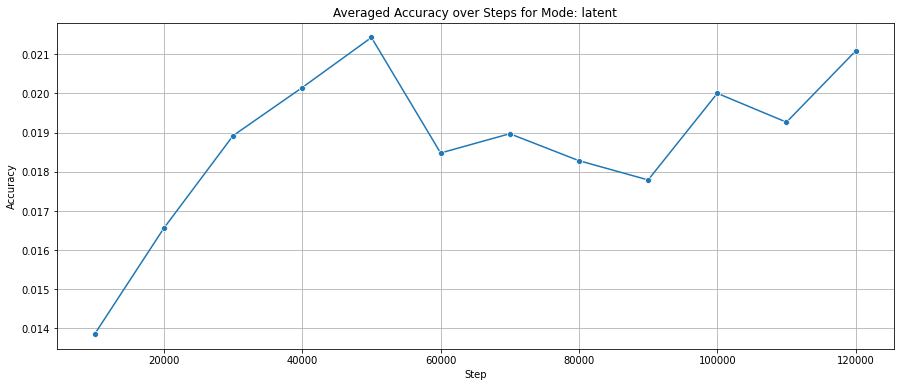

Maximum accuracy in reference mode: 0.0198 at step 30000


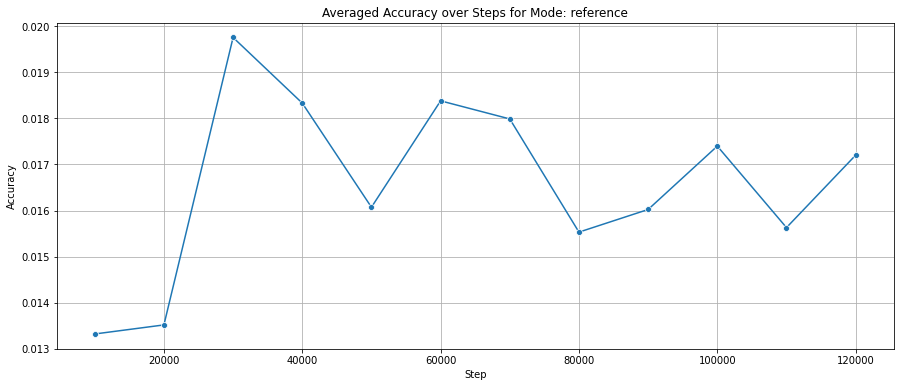

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_metric_averaged(data, mode, metric):
    # Filter the DataFrame based on mode
    filtered_data = data[data['mode'] == mode]
    
    # Group by step and calculate the mean of the metric
    averaged_data = filtered_data.groupby('step', as_index=False)[metric].mean()

    # Print the maximum value of the metric and its corresponding step
    max_value = averaged_data[metric].max()
    max_step = averaged_data[averaged_data[metric] == max_value]['step'].values[0]
    print(f'Maximum {metric} in {mode} mode: {max_value:.4f} at step {max_step}')
    
    # Plotting the line plot
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=averaged_data, x='step', y=metric, marker='o')
    plt.title(f"Averaged {metric.capitalize()} over Steps for Mode: {mode}")
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()



for mode in domain_scores['mode'].unique():
    plot_metric_averaged(domain_scores, mode, 'accuracy')

Maximum accuracy in reference mode: 0.0193 at step 30000


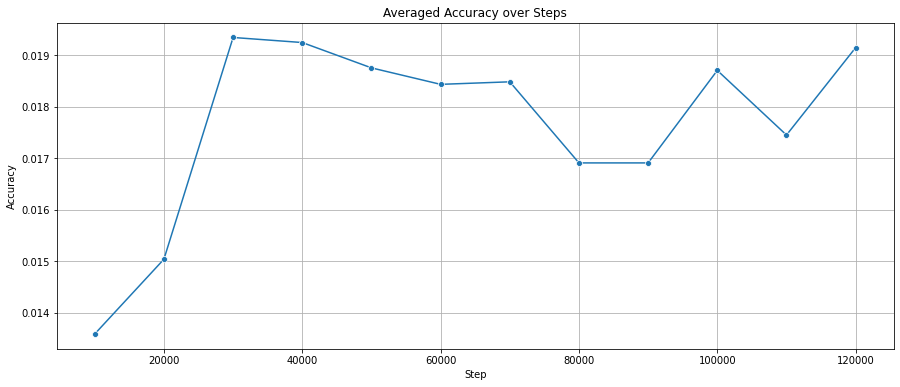

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_metric_averaged(data, metric):
    
    # Group by step and calculate the mean of the metric
    averaged_data = data.groupby('step', as_index=False)[metric].mean()

    # Print the maximum value of the metric and its corresponding step
    max_value = averaged_data[metric].max()
    max_step = averaged_data[averaged_data[metric] == max_value]['step'].values[0]
    print(f'Maximum {metric} in {mode} mode: {max_value:.4f} at step {max_step}')
    
    # Plotting the line plot
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=averaged_data, x='step', y=metric, marker='o')
    plt.title(f"Averaged {metric.capitalize()} over Steps")
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()



plot_metric_averaged(domain_scores, 'accuracy')

## Distance Score

In [22]:
distance_scores = pd.read_csv('eval/dist_scores.csv')
distance_scores.head()

,step,mode,source,target,domain,distance
0,10000,latent,WAL,RUN,0,1.440309
1,10000,latent,WAL,RUN,1,1.246127
2,10000,latent,WAL,RUN,2,1.581021
3,10000,latent,WAL,RUN,3,1.602185
4,10000,latent,WAL,RUN,4,2.047142


Minimum distance in latent mode: 1.3485 at step 10000


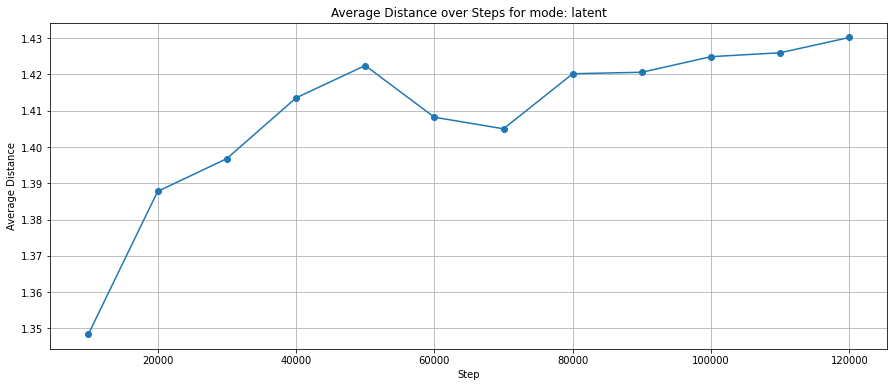

Minimum distance in reference mode: 1.3448 at step 10000


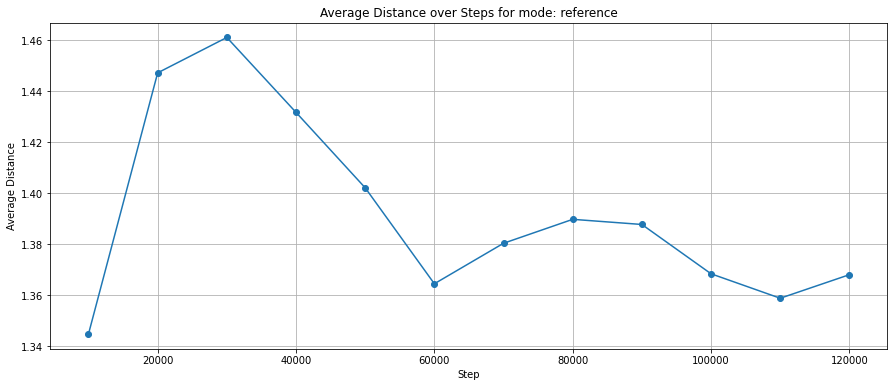

In [23]:
def plot_dist(data, mode):
    # Filter the dataframe by the given mode
    filtered_data = data[data['mode'] == mode]
    
    # Group by 'step' and calculate the mean of 'distance'
    grouped_data = filtered_data.groupby('step')['distance'].mean().reset_index()

    min_distance = grouped_data['distance'].min()
    min_step = grouped_data[grouped_data['distance'] == min_distance]['step'].values[0]
    print(f'Minimum distance in {mode} mode: {min_distance:.4f} at step {min_step}')
    
    # Plot the data
    plt.figure(figsize=(15, 6))
    plt.plot(grouped_data['step'], grouped_data['distance'], marker='o')
    plt.xlabel('Step')
    plt.ylabel('Average Distance')
    plt.title(f'Average Distance over Steps for mode: {mode}')
    plt.grid(True)
    plt.show()

for mode in distance_scores['mode'].unique():
    plot_dist(distance_scores, mode)

Minimum distance: 1.3466 at step 10000


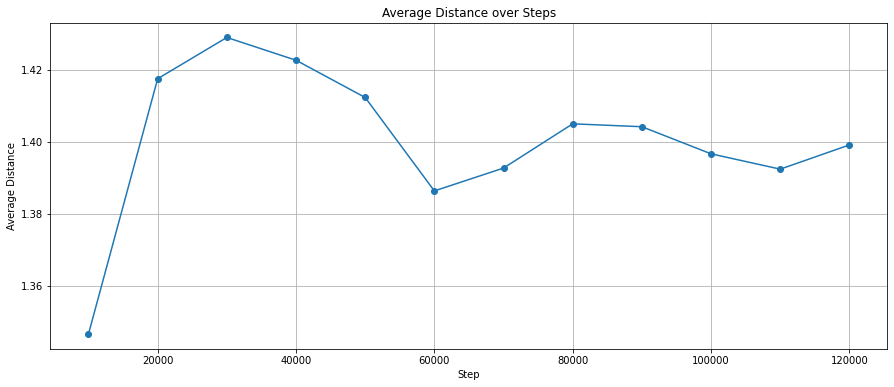

In [24]:
def plot_dist(data):
    
    # Group by 'step' and calculate the mean of 'distance'
    grouped_data = data.groupby('step')['distance'].mean().reset_index()

    min_value = grouped_data['distance'].min()
    min_step = grouped_data[grouped_data['distance'] == min_value]['step'].values[0]
    print(f'Minimum distance: {min_value:.4f} at step {min_step}')
    
    # Plot the data
    plt.figure(figsize=(15, 6))
    plt.plot(grouped_data['step'], grouped_data['distance'], marker='o')
    plt.xlabel('Step')
    plt.ylabel('Average Distance')
    plt.title(f'Average Distance over Steps')
    plt.grid(True)
    plt.show()

plot_dist(distance_scores)